In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
import PIL

### Building AlexNet's Customized Model

In [2]:
num_classes = 2

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    
    layers.Conv2D(96, 11, strides=4),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(256, 5, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Conv2D(384, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    
    layers.Conv2D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(3, strides=2),
    
    layers.Flatten(),
    
    layers.Dense(9216),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    
    layers.Dense(4096),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.Dropout(0.4),
    
    layers.Dense(num_classes),
    layers.BatchNormalization(),
    layers.Activation('softmax')
])

In [3]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=SGD(lr=0.0001, momentum=0.9), metrics=['accuracy'])

### Dataset 1

In [4]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/val/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/ct-sub-datasets/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 425 files belonging to 2 classes.
Found 118 files belonging to 2 classes.
Found 203 files belonging to 2 classes.


In [5]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 40,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_cust_dataset_1")

Epoch 1/40
14/14 [==============================] - 3s 233ms/step - loss: 0.9521 - accuracy: 0.4965 - val_loss: 0.6948 - val_accuracy: 0.4915
Epoch 2/40
14/14 [==============================] - 3s 183ms/step - loss: 0.7721 - accuracy: 0.5694 - val_loss: 0.6942 - val_accuracy: 0.4915
Epoch 3/40
14/14 [==============================] - 3s 184ms/step - loss: 0.7182 - accuracy: 0.5929 - val_loss: 0.6959 - val_accuracy: 0.4915
Epoch 4/40
14/14 [==============================] - 3s 183ms/step - loss: 0.6620 - accuracy: 0.6518 - val_loss: 0.6992 - val_accuracy: 0.4915
Epoch 5/40
14/14 [==============================] - 3s 185ms/step - loss: 0.5890 - accuracy: 0.6871 - val_loss: 0.7076 - val_accuracy: 0.4915
Epoch 6/40
14/14 [==============================] - 3s 183ms/step - loss: 0.5151 - accuracy: 0.7435 - val_loss: 0.7145 - val_accuracy: 0.4915
Epoch 7/40
14/14 [==============================] - 3s 185ms/step - loss: 0.5573 - accuracy: 0.7294 - val_loss: 0.7232 - val_accuracy: 0.4915
Epoch 

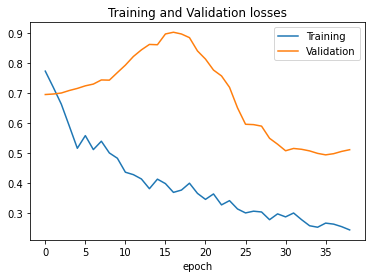

In [6]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_cust_ds_1.png")

In [7]:
model.evaluate(test_ds)

7/7 [==============================] - 0s 56ms/step - loss: 0.5850 - accuracy: 0.6601


[0.5850065350532532, 0.6600984930992126]

### Dataset 2

In [8]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/train',
                                                               image_size=(227, 227),
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/validation/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/data-try2/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 612 files belonging to 2 classes.
Found 99 files belonging to 2 classes.
Found 91 files belonging to 2 classes.


In [9]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 50,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_cust_dataset_2")

Epoch 1/50
20/20 [==============================] - 4s 181ms/step - loss: 0.4874 - accuracy: 0.7810 - val_loss: 0.4256 - val_accuracy: 0.7980
Epoch 2/50
20/20 [==============================] - 2s 110ms/step - loss: 0.4538 - accuracy: 0.7941 - val_loss: 0.4452 - val_accuracy: 0.8384
Epoch 3/50
20/20 [==============================] - 2s 110ms/step - loss: 0.4473 - accuracy: 0.7908 - val_loss: 0.4384 - val_accuracy: 0.8182
Epoch 4/50
20/20 [==============================] - 2s 111ms/step - loss: 0.3907 - accuracy: 0.8350 - val_loss: 0.3969 - val_accuracy: 0.8485
Epoch 5/50
20/20 [==============================] - 2s 111ms/step - loss: 0.3745 - accuracy: 0.8562 - val_loss: 0.3777 - val_accuracy: 0.8384
Epoch 6/50
20/20 [==============================] - 2s 111ms/step - loss: 0.3659 - accuracy: 0.8529 - val_loss: 0.3849 - val_accuracy: 0.8283
Epoch 7/50
20/20 [==============================] - 2s 110ms/step - loss: 0.3322 - accuracy: 0.8824 - val_loss: 0.3794 - val_accuracy: 0.8485
Epoch 

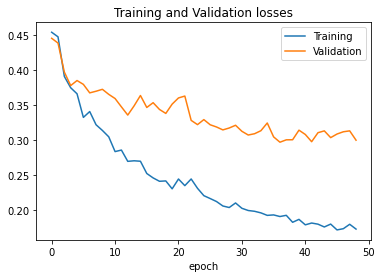

In [11]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_cust_ds_2.png")

In [12]:
model.evaluate(test_ds)

3/3 [==============================] - 0s 106ms/step - loss: 0.2867 - accuracy: 0.9011


[0.28669559955596924, 0.901098906993866]

### Dataset 3

In [13]:
train_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                               image_size=(227, 227),
                                                               validation_split=0.2,
                                                               subset="training",
                                                               seed=123,
                                                               batch_size=32,
                                                               label_mode='categorical')

val_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/train/',
                                                             image_size=(227, 227),
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             seed=123,
                                                             batch_size=32,
                                                             label_mode='categorical')

test_ds = keras.preprocessing.image_dataset_from_directory( r'../datasets/kaggle-large-ct/test/',
                                                             image_size=(227, 227),
                                                             batch_size=32,
                                                             label_mode='categorical')

Found 2233 files belonging to 2 classes.
Using 1787 files for training.
Found 2233 files belonging to 2 classes.
Using 446 files for validation.
Found 248 files belonging to 2 classes.


In [14]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 40,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_cust_dataset_3")

Epoch 1/40
56/56 [==============================] - 13s 236ms/step - loss: 0.6718 - accuracy: 0.6637 - val_loss: 0.5624 - val_accuracy: 0.6951
Epoch 2/40
56/56 [==============================] - 13s 230ms/step - loss: 0.4462 - accuracy: 0.7963 - val_loss: 0.6201 - val_accuracy: 0.6435
Epoch 3/40
56/56 [==============================] - 13s 228ms/step - loss: 0.3810 - accuracy: 0.8428 - val_loss: 0.5827 - val_accuracy: 0.6682
Epoch 4/40
56/56 [==============================] - 12s 223ms/step - loss: 0.3288 - accuracy: 0.8797 - val_loss: 0.4423 - val_accuracy: 0.7623
Epoch 5/40
56/56 [==============================] - 13s 229ms/step - loss: 0.3033 - accuracy: 0.8948 - val_loss: 0.3743 - val_accuracy: 0.8520
Epoch 6/40
56/56 [==============================] - 13s 229ms/step - loss: 0.2957 - accuracy: 0.8982 - val_loss: 0.3062 - val_accuracy: 0.8991
Epoch 7/40
56/56 [==============================] - 13s 226ms/step - loss: 0.2668 - accuracy: 0.9077 - val_loss: 0.3029 - val_accuracy: 0.9126

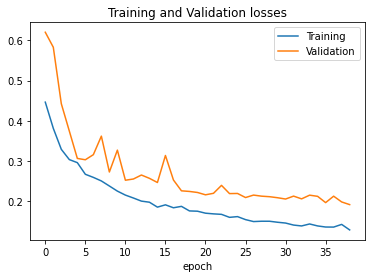

In [15]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_cust_ds_3.png")

In [16]:
model.evaluate(test_ds)

8/8 [==============================] - 0s 61ms/step - loss: 0.2436 - accuracy: 0.9395


[0.24357029795646667, 0.9395161271095276]

### Dataset 4

In [17]:
from keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = training_datagen.flow_from_directory(r'../datasets/CovidDataset/Train',
                                                target_size=(227, 227),
                                                class_mode='categorical')

val_ds = test_datagen.flow_from_directory(r'../datasets/CovidDataset/Val/',
                                          target_size=(227, 227),
                                          class_mode='categorical')

Found 224 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [18]:
results = model.fit(
    train_ds,
    batch_size = 32,
    epochs = 40,
    validation_data = val_ds,
    verbose=1,
)

model.save("./AlexNet_cust_dataset_4")

Epoch 1/40
7/7 [==============================] - 9s 1s/step - loss: 0.3876 - accuracy: 0.8080 - val_loss: 0.7301 - val_accuracy: 0.5000
Epoch 2/40
7/7 [==============================] - 8s 1s/step - loss: 0.3182 - accuracy: 0.8795 - val_loss: 0.8804 - val_accuracy: 0.5000
Epoch 3/40
7/7 [==============================] - 8s 1s/step - loss: 0.2796 - accuracy: 0.9107 - val_loss: 0.8110 - val_accuracy: 0.5000
Epoch 4/40
7/7 [==============================] - 8s 1s/step - loss: 0.2415 - accuracy: 0.9330 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 5/40
7/7 [==============================] - 8s 1s/step - loss: 0.2413 - accuracy: 0.9152 - val_loss: 0.7613 - val_accuracy: 0.5000
Epoch 6/40
7/7 [==============================] - 8s 1s/step - loss: 0.1991 - accuracy: 0.9509 - val_loss: 0.8300 - val_accuracy: 0.5000
Epoch 7/40
7/7 [==============================] - 8s 1s/step - loss: 0.2068 - accuracy: 0.9598 - val_loss: 0.8437 - val_accuracy: 0.5000
Epoch 8/40
7/7 [=========================

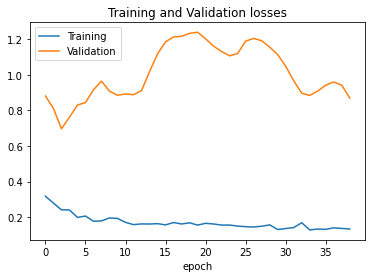

In [19]:
results.history.keys()
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results.history['loss'][1:])
plt.plot(results.history['val_loss'][1:])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.savefig("../project/AlexNet_cust_ds_4.png")